# Forecasting exercise (NVIDIA)

## STEP 1: Install and import libraries

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

## STEP 2: Download NVIDIA stock data

In [6]:
df_raw = yf.download("NVDA", start="2018-01-01")

df_raw.columns = df_raw.columns.get_level_values(0)

[*********************100%***********************]  1 of 1 completed


In [7]:
df = df_raw.copy() #many dropna cause the dataframe to collapse. so we put this
df.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2026-02-02,185.610001,190.300003,184.880005,187.199997,165794100
2026-02-03,180.339996,186.270004,176.229996,186.240005,204019600
2026-02-04,174.190002,179.580002,171.910004,179.460007,207014100
2026-02-05,171.880005,176.820007,171.029999,174.929993,206312900
2026-02-06,185.410004,187.000000,174.600006,176.690002,230887800


## STEP 3: Plot the series

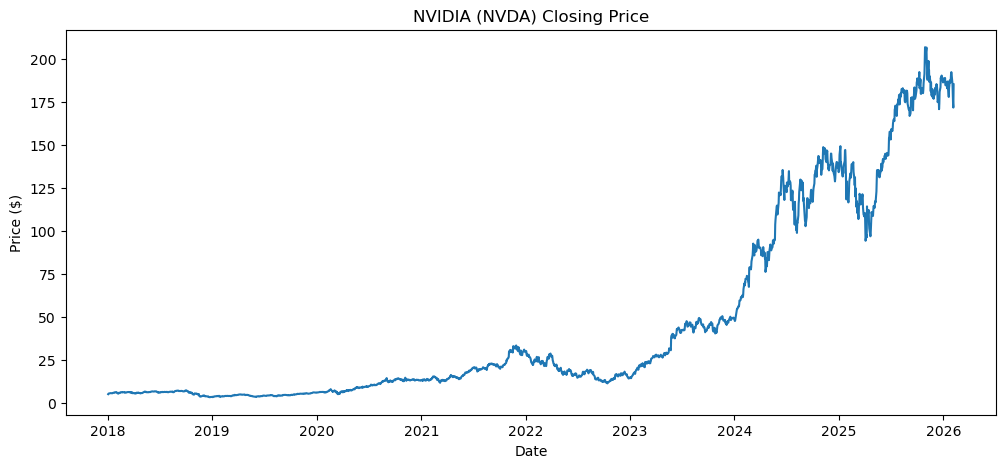

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"])
plt.title("NVIDIA (NVDA) Closing Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

## STEP 4: Create features (moving averages)

In [11]:
df["MA_5"] = df["Close"].rolling(window=5).mean()
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_20"] = df["Close"].rolling(window=20).mean()
df = df.dropna()
df.head()

# ex: MA_5 = Take today’s price and the previous 4 days and average them into one number.

# Lags → individual past values
# Moving averages → smoothed summaries of many lags

Price,Close,High,Low,Open,Volume,MA_5,MA_10,MA_20
Date,,,,,,,,
2018-01-30,6.000771,6.092246,5.894214,5.960967,570832000,5.958494,5.827017,5.602878
2018-01-31,6.076918,6.162707,6.043542,6.076176,478576000,6.007940,5.879133,5.660297
2018-02-01,5.945885,6.104112,5.885561,5.896933,519224000,6.028460,5.918838,5.694947
2018-02-02,5.773319,5.883337,5.715220,5.859355,718464000,5.979954,5.927269,5.719583
2018-02-05,5.283309,5.766149,5.068218,5.612125,1165204000,5.816040,5.877847,5.717482


## STEP 5: Define X (features) and y (target)

In [13]:
df["Target"] = df["Close"].shift(-1) #moves data values one position upward (backward) within a DataFrame or Series
df = df.dropna() #Delete any row that has at least one NaN

X = df[["Close", "MA_5", "MA_10", "MA_20"]]
y = df["Target"]

# On Feb 5, NVDA closed at 171.88. Using today’s price and moving averages, the correct answer is that Feb 6 closed at 185.41.

In [14]:
df.tail(10)

Price,Close,High,Low,Open,Volume,MA_5,MA_10,MA_20,Target
Date,,,,,,,,,
2026-01-23,187.669998,189.600006,186.820007,187.500000,142748100,184.026001,184.593001,186.284500,186.470001
2026-01-26,186.470001,189.119995,185.990005,187.160004,124799600,184.074002,184.754001,186.177500,188.520004
2026-01-27,188.520004,190.000000,185.699997,187.240005,143711600,186.164001,185.112001,186.077000,191.520004
2026-01-28,191.520004,192.350006,189.839996,191.270004,148552700,187.804001,185.683002,186.242001,192.509995
2026-01-29,192.509995,193.479996,186.059998,191.339996,171764400,189.338000,186.620001,186.490501,191.130005
2026-01-30,191.130005,194.490005,189.470001,191.210007,179489500,190.030002,187.028001,186.722001,185.610001
2026-02-02,185.610001,190.300003,184.880005,187.199997,165794100,189.858002,186.966002,186.560001,180.339996
2026-02-03,180.339996,186.270004,176.229996,186.240005,204019600,188.222000,187.193001,186.171001,174.190002
2026-02-04,174.190002,179.580002,171.910004,179.460007,207014100,184.756000,186.280000,185.518501,171.880005


## STEP 6: Train-test split
- is important to mention that we do not shuffle de data, as time series is not independent.
- Time has direction. The future must never influence the past.
- if we shuffle... there will be data leakage (train_test_split shuffles it by default and assumes observations are independent)

In [16]:
cut = int(len(df) * 0.8)
X_train, X_test = X[:cut], X[cut:]
y_train, y_test = y[:cut], y[cut:]

# First 80% = training
# Last 20% = test (future data)

## STEP 7: Train the Linear Regression model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## STEP 8: Make predictions

In [20]:
y_pred = model.predict(X_test)

## STEP 9: Evaluate the model

In [22]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)

MAE: 3.1644705701953044
R²: 0.9783058077297032


## STEP 10: Plot Actual vs Predicted Values

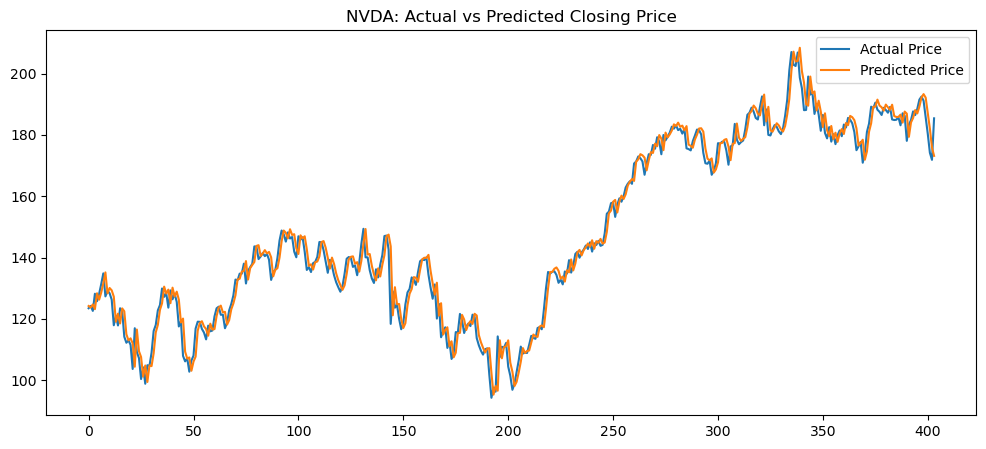

In [24]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.legend()
plt.title("NVDA: Actual vs Predicted Closing Price")
plt.show()

In [25]:
last_row = X.iloc[-1].values.reshape(1, -1)
next_day_price = model.predict(last_row)

print("Predicted next day closing price:", next_day_price[0])

Predicted next day closing price: 173.16363077797737


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Forecasting Exercise (NVIDIA) with Returns

In [27]:
dfr = df_raw.copy()
dfr.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,4.928533,4.932242,4.808627,4.840272,355616000
2018-01-03,5.252900,5.283310,5.037315,5.045968,914704000
2018-01-04,5.280589,5.390854,5.258338,5.334238,583268000
2018-01-05,5.325338,5.362670,5.218535,5.295423,580124000
2018-01-08,5.488508,5.562677,5.403955,5.448951,881216000


## STEP 1: Create the "Return" column, the features (moving averages) and the "Target"

In [29]:
dfr["Return"] = dfr["Close"].pct_change() # (Current - Previous) / Previous

dfr["MA_5"]  = dfr["Return"].rolling(5).mean()
dfr["MA_10"] = dfr["Return"].rolling(10).mean()
dfr["MA_20"] = dfr["Return"].rolling(20).mean()

dfr["Target"] = dfr["Return"].shift(-1)
dfr = dfr.dropna()

dfr.tail()

Price,Close,High,Low,Open,Volume,Return,MA_5,MA_10,MA_20,Target
Date,,,,,,,,,,
2026-01-30,191.130005,194.490005,189.470001,191.210007,179489500,-0.007168,0.003703,0.002340,0.001353,-0.028881
2026-02-02,185.610001,190.300003,184.880005,187.199997,165794100,-0.028881,-0.000795,-0.000110,-0.000721,-0.028393
2026-02-03,180.339996,186.270004,176.229996,186.240005,204019600,-0.028393,-0.008672,0.001432,-0.001947,-0.034102
2026-02-04,174.190002,179.580002,171.910004,179.460007,207014100,-0.034102,-0.018675,-0.004926,-0.003418,-0.013261
2026-02-05,171.880005,176.820007,171.029999,174.929993,206312900,-0.013261,-0.022361,-0.007081,-0.004581,0.078718


## STEP 2: Define X and Y

In [31]:
X = dfr[["Return", "MA_5", "MA_10", "MA_20"]]
y = dfr["Target"]

## STEP 3: Train-Test Split

In [33]:
cut = int(len(dfr) * 0.8)

X_train, X_test = X[:cut], X[cut:]
y_train, y_test = y[:cut], y[cut:]

## STEP 4: Train the Linear Regression model

In [35]:
model_returns = LinearRegression()
model_returns.fit(X_train, y_train)

LinearRegression()

## STEP 5: Make predictions

In [37]:
y_pred = model_returns.predict(X_test)

## STEP 6: Evaluate the model

In [39]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R²:", r2)

MAE: 0.022271207510232312
R²: 0.012304338362803868


## STEP 7: Next Day Return

In [75]:
last_row = X.iloc[-1]
last_row = last_row.values.reshape(1, -1)
last_row

array([[-0.01326137, -0.02236115, -0.00708131, -0.00458084]])

In [80]:
next_day_return = model_returns.predict(last_row)
print("Predicted next-day return:", next_day_return[0])

Predicted next-day return: 0.003221375399813295


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
